# Taking the top 5 countries and bottom 5 countries in 2021, how did their HDI scores change in the span of 10 years (2011-2021)?

In [2]:
# libraries and CSV imports
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import textwrap

hdi_range = Path('resources/HDI_range.csv')
HDI_data = pd.read_csv(hdi_range)
HDI_data.rename(columns={'Human Development Index (2011)':'2011', 'Human Development Index (2012)':'2012',
                      'Human Development Index (2013)':'2013', 'Human Development Index (2014)':'2014', 
                      'Human Development Index (2015)':'2015', 'Human Development Index (2016)':'2016',
                      'Human Development Index (2017)':'2017', 'Human Development Index (2018)':'2018',
                      'Human Development Index (2019)':'2019', 'Human Development Index (2020)':'2020',
                      'Human Development Index (2021)':'2021'}, inplace=True)
HDI_data

,Country,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Afghanistan,0.456,0.466,0.474,0.479,0.478,0.481,0.482,0.483,0.488,0.483,0.478
1,Angola,0.526,0.541,0.552,0.563,0.582,0.596,0.597,0.595,0.595,0.590,0.586
2,Albania,0.766,0.778,0.785,0.792,0.795,0.798,0.802,0.806,0.810,0.794,0.796
3,Andorra,0.849,0.869,0.864,0.871,0.867,0.871,0.868,0.872,0.873,0.848,0.858
4,United Arab Emirates,0.840,0.846,0.852,0.859,0.865,0.870,0.897,0.909,0.920,0.912,0.911
...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,0.713,0.709,0.710,0.711,0.716,0.717,0.716,0.716,0.715,0.712,0.707
191,Yemen,0.509,0.512,0.513,0.505,0.477,0.467,0.459,0.459,0.461,0.460,0.455
192,South Africa,0.686,0.696,0.704,0.712,0.716,0.719,0.720,0.726,0.736,0.727,0.713
193,Zambia,0.534,0.548,0.554,0.557,0.562,0.564,0.568,0.572,0.575,0.570,0.565


In [3]:
HDI_data.set_index('Country')
HDI_top = HDI_data.sort_values(by=['2021'], ascending=False)
hdi_top5 = HDI_top.head(5).set_index('Country')

hdi_top5


,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,
Switzerland,0.943,0.945,0.948,0.952,0.954,0.956,0.957,0.959,0.962,0.956,0.962
Norway,0.944,0.946,0.949,0.952,0.953,0.955,0.959,0.962,0.961,0.959,0.961
Iceland,0.912,0.921,0.929,0.938,0.945,0.948,0.954,0.959,0.960,0.957,0.959
Hong Kong,0.914,0.918,0.924,0.930,0.935,0.938,0.944,0.949,0.952,0.949,0.952
Australia,0.926,0.930,0.929,0.931,0.933,0.935,0.937,0.941,0.941,0.947,0.951


In [5]:
HDI_bottom = HDI_data.sort_values(by=['2021'])
hdi_bottom5 = HDI_bottom.head(5).set_index('Country')

hdi_bottom5

,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Country,,,,,,,,,,,
South Sudan,0.433,0.397,0.411,0.410,0.412,0.402,0.395,0.395,0.393,0.386,0.385
Chad,0.372,0.381,0.386,0.393,0.389,0.391,0.393,0.398,0.403,0.397,0.394
Niger,0.346,0.354,0.362,0.370,0.376,0.383,0.390,0.399,0.406,0.401,0.400
Central African Republic,0.381,0.388,0.368,0.370,0.384,0.391,0.398,0.405,0.411,0.407,0.404
Burundi,0.410,0.416,0.421,0.426,0.428,0.430,0.428,0.428,0.431,0.426,0.426


<Figure size 1200x800 with 0 Axes>

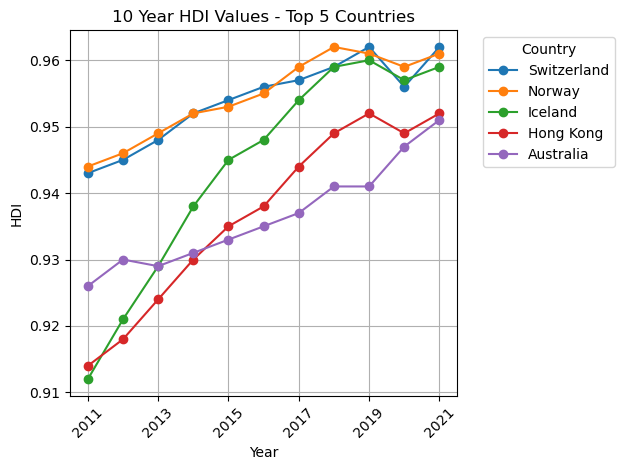

<Figure size 1200x800 with 0 Axes>

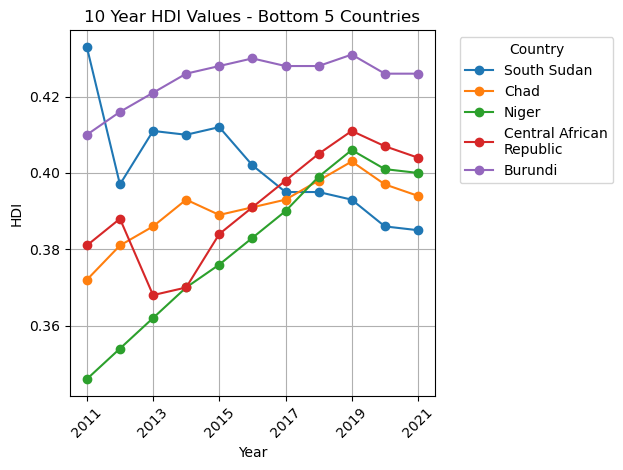

In [4]:
def plot_and_wrap(dataframe, title):
    plt.figure(figsize=(12, 8))
    dataframe.T.plot(marker='o', linestyle='-')
    plt.xlabel('Year')
    plt.ylabel('HDI')
    plt.title(title)
    plt.xticks(rotation=45)
    legend = plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')
    wrapper = textwrap.TextWrapper(width=15)
    wrapped_labels = [wrapper.fill(label) for label in dataframe.index]
    for text_legend, label in zip(legend.texts, wrapped_labels):
        text_legend.set_text(label)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
plot_and_wrap(hdi_top5, '10 Year HDI Values - Top 5 Countries')
plot_and_wrap(hdi_bottom5, '10 Year HDI Values - Bottom 5 Countries')


## Analysis
- Both the top and bottom 5 countries started in a different order than what they ended in the 10 year span we looked at. 
- The top 5 countries showed a steady , but several had a dip in 2020 (Could this be a Covid-related dip?)
- The bottom 5 countries did not show a steady tragectory, but did all have a dip also in 2020